# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## 1.  Reading and Understanding the Data


In [2]:
df = pd.read_csv('day.csv')

In [3]:
## Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Inspection

In [4]:
## Checking number of rows and columns in data
df.shape

(730, 16)

In [5]:
## Checking information of columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
## checking the details of numerical data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#  Data Quality Check and Missing Values

In [7]:
## Checking missing values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# percentage of missing values in all columns
df.null_percentage = df.isnull().sum()/len(df)*100

In [9]:
## There are 730 rows and 16 colomns and there is no Missing or Null value in this dataset
df.null_percentage.sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [10]:
## Renaming columns for better readibility.
df.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity',
                     'weathersit':'Weather'}, inplace=True)

In [11]:
df.head()

,instant,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# 2. Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.



We'll visualise our data using `matplotlib` and `seaborn`.

#### Removing Extra Columns

In [12]:
## Creating new dataframe by removing uneccessary or extra columns and assigning new dataframe df_1 with remaining columns

new_columns = ['Season', 'Year', 'Month', 'holiday', 'weekday', 'workingday', 'Weather', 'temp', 'atemp', 
            'Humidity', 'windspeed','cnt']

df_1 = df[new_columns]
df_1.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


Observation: We can observered that all the columns are of numerical type, but from the data dictionary we can see that there are some columns which represents categorical data as well.

Binary Types : Year, holiday, workingday

Categorical Types: Season, Month, weekday, Weather

Numeric types: temp, atemp, Humidity, windspeed, cnt

### Converting Season and Weathersit to categorical types


In [13]:
df_1.Season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df_1.Weather.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df_1.Month = df_1.Month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df_1.weekday = df_1.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df_1.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables                                                 

<Figure size 1080x2160 with 0 Axes>

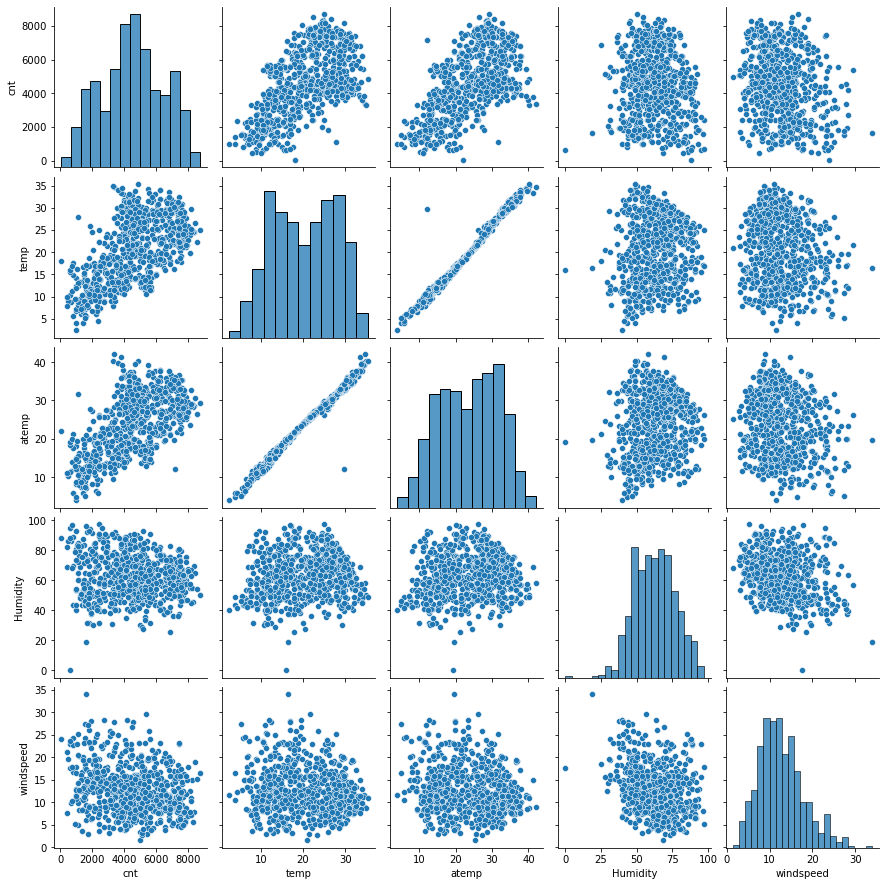

In [14]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df_1,vars=['cnt','temp','atemp','Humidity','windspeed'])
plt.show()

Observation:
From the above graghs, clearly it is showing that there is highest linear relation between temp, atemp with Count which means temp and atemp are highly co-related with each other and this means we can do the linear regression to solve this problem.


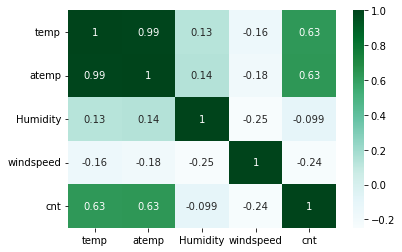

In [15]:
# Checking correlation between numerical variables by using Heatmap
sns.heatmap(df_1[['temp','atemp','Humidity','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

Observation: From the above heatmap we can see that there is a linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity and we will decide which parameters to keep based on VIF and p-value based on the other variables.


#### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

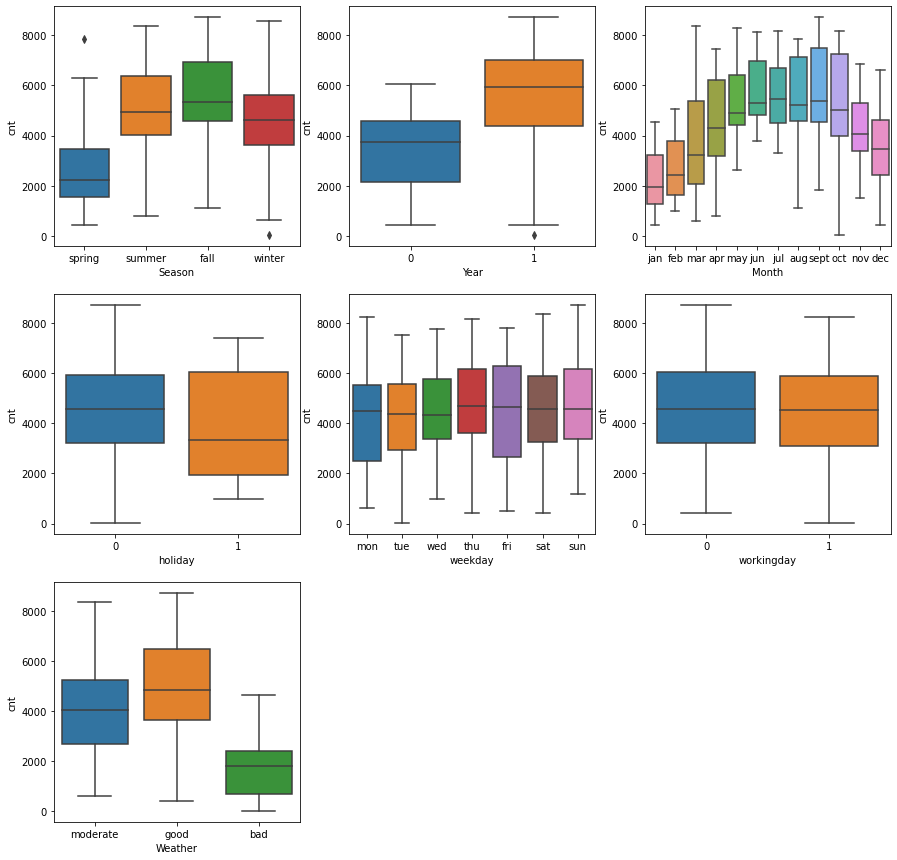

In [16]:
cat_variable = ['Season','Year','Month','holiday','weekday','workingday','Weather']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_variable):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df_1, x=i[1], y='cnt')
plt.show()

Observation:

Below insights are drawn from the above boxplots.

1. In the fall season there seems to be the highest demand for rented bikes, followed by Summer and Winter.
2. Counts of Bike rental increased and became more popular in the year of 2019 than 2018 means the business is going good.
3. September has the highest demand. After September, demand is decreasing and in initial months demand is growing.
4. Demand is decreasing during the holidays.
5. Weekday is not giving a clear picture about customer demand on rental bikes.
6. There are similar demands whether it is a working day or not.
7. It clearly shows that if the weather is good or clear, the bike rental demand is more.


# 3. Data Preparation

### Creating dummy variables for all categorical variables


In [17]:
## Before creating dummy variables we will have to convert them into 'category' data types
## Checking datatypes
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   Weather     730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [18]:
# Converting 'category' datatype

df_1['Season']=df_1['Season'].astype('category')
df_1['Weather']=df_1['Weather'].astype('category')
df_1['Month']=df_1['Month'].astype('category')
df_1['weekday']=df_1['weekday'].astype('category')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Season      730 non-null    category
 1   Year        730 non-null    int64   
 2   Month       730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   Weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   Humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [19]:
## Above code created Dummy variable and dropped the original variable for which the dummy was created and dropped first dummy variable for each set of dummies created.

df_1 = pd.get_dummies(df_1, drop_first=True)

In [20]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   Humidity          730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   Season_spring     730 non-null    uint8  
 9   Season_summer     730 non-null    uint8  
 10  Season_winter     730 non-null    uint8  
 11  Month_aug         730 non-null    uint8  
 12  Month_dec         730 non-null    uint8  
 13  Month_feb         730 non-null    uint8  
 14  Month_jan         730 non-null    uint8  
 15  Month_jul         730 non-null    uint8  
 16  Month_jun         730 non-null    uint8  
 1

In [21]:
## We have total 30 columns and now we can start model building
df_1.shape

(730, 30)

# 4. Splitting the Data into Training and Testing Sets

In [22]:
## Splitting the data into train and test dataframes

np.random.seed(0)
df_train, df_test = train_test_split(df_1, train_size = 0.70, test_size = 0.30, random_state = 100)

In [23]:
# Checking shape and size for train and test
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the Features 

using MinMax scalling

In [24]:
## Importing MinMax scaler from preprocessing module of sklearn library
from sklearn.preprocessing import MinMaxScaler

In [25]:
## Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

In [26]:
## Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','Humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
df_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,Season_spring,Season_summer,...,Month_oct,Month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,Weather_good,Weather_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [28]:
df_train.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,Season_spring,Season_summer,...,Month_oct,Month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,Weather_good,Weather_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.627451,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


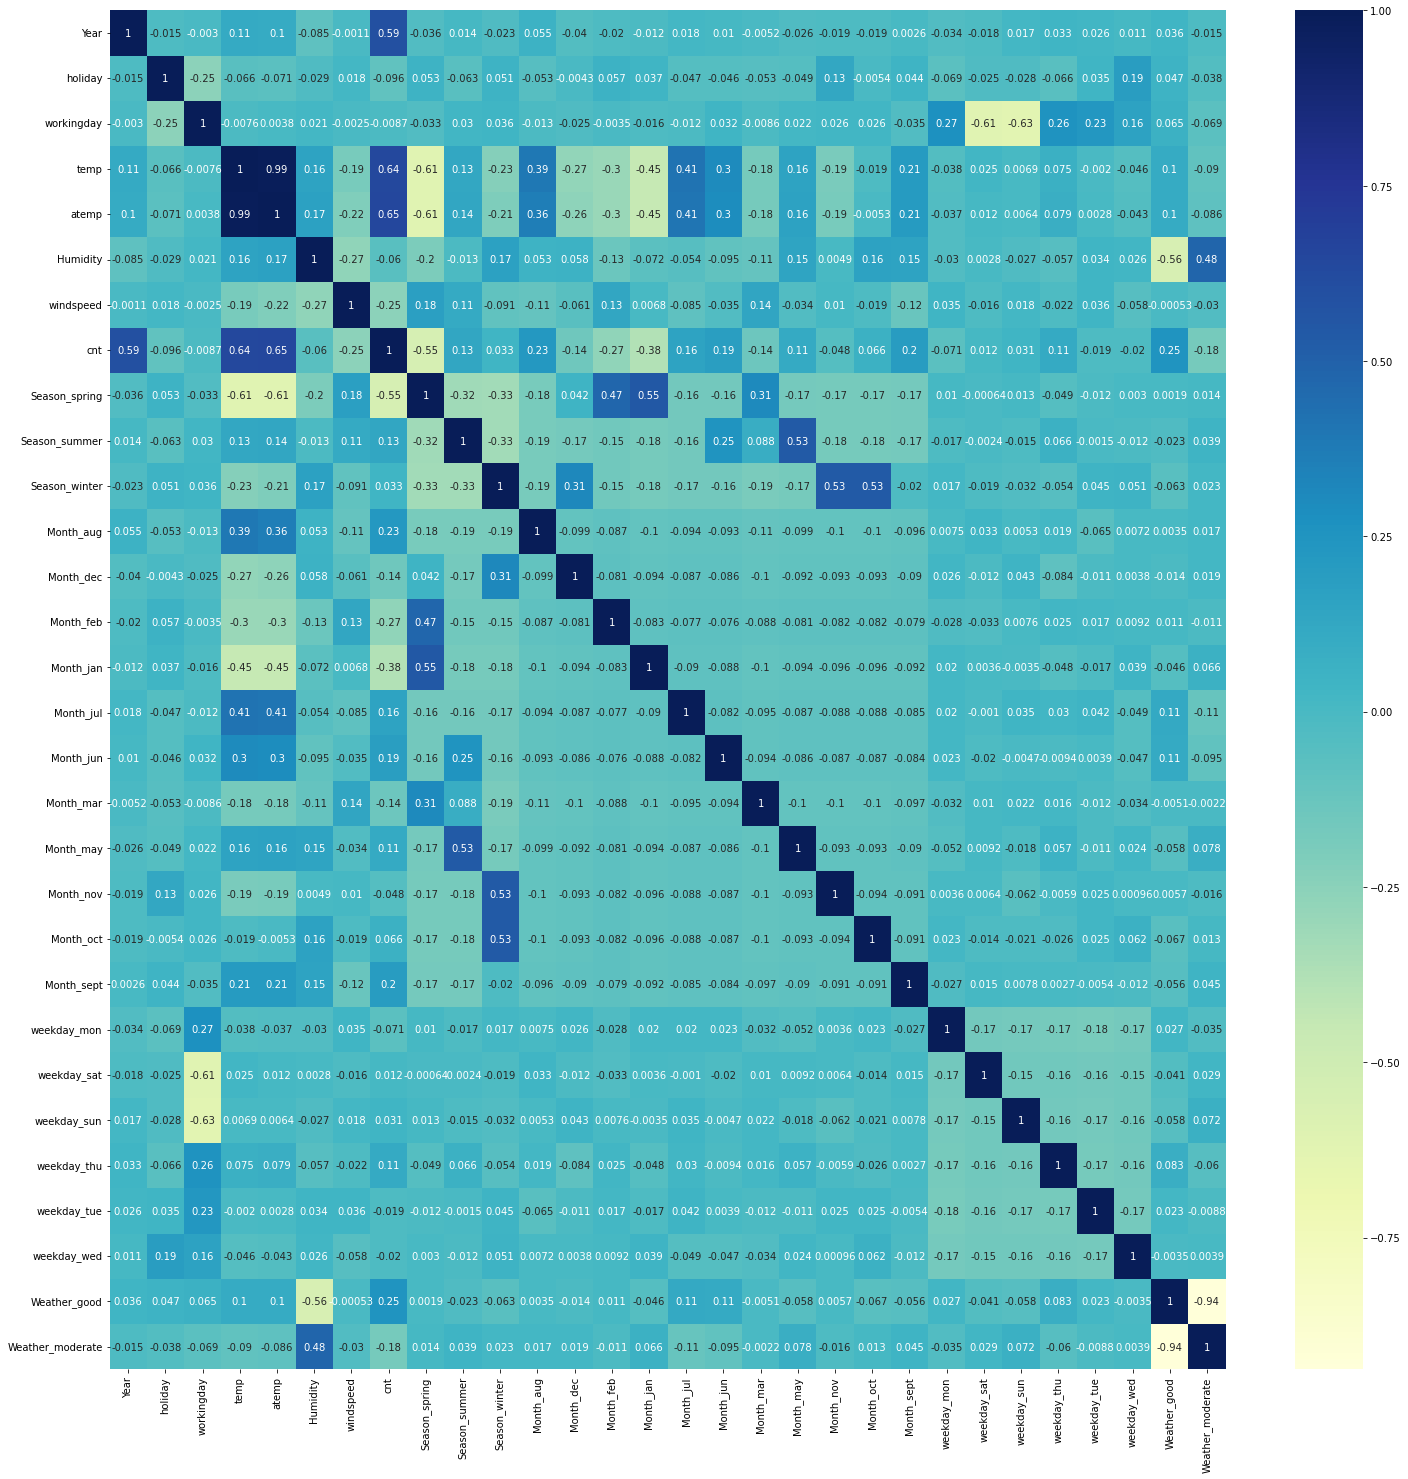

In [29]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observation: 

We can clearly see that from the above heatmap that cnt seems to have correlation with year variable and temp. 

Likewise, Misty and humidity show correlation and Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

All variables are multicollinear in nature and also shows that which variable have high collinearity with the target variable.We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value and for identifying the correct variable to select or eliminate from the model.

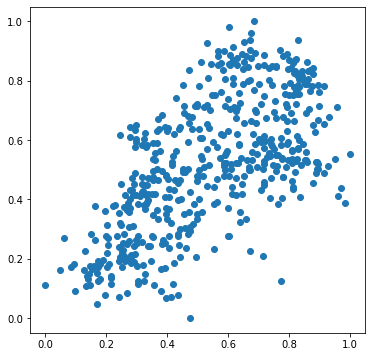

In [30]:
### Visualizing one of the correlation to see the trends by using Scatter plot.


plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Observation:
So, we pick temp as the first variable and we'll try to fit a regression line to that.

# 5. BUILDING A LINEAR MODEL


### Dividing into X and Y sets for the model building


In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

In [32]:
## Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
## Using and running RFE for feature selection and limiting selection to 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [34]:
## Columns selected by RFE and their features

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', True, 1),
 ('Season_winter', True, 1),
 ('Month_aug', False, 10),
 ('Month_dec', True, 1),
 ('Month_feb', False, 2),
 ('Month_jan', True, 1),
 ('Month_jul', True, 1),
 ('Month_jun', False, 14),
 ('Month_mar', False, 15),
 ('Month_may', False, 7),
 ('Month_nov', True, 1),
 ('Month_oct', False, 12),
 ('Month_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('Weather_good', True, 1),
 ('Weather_moderate', True, 1)]

In [35]:
## Checking the selected variable 

col_rfe = X_train.columns[rfe.support_]
print(col_rfe)

Index(['Year', 'holiday', 'temp', 'Humidity', 'windspeed', 'Season_spring',
       'Season_summer', 'Season_winter', 'Month_dec', 'Month_jan', 'Month_jul',
       'Month_nov', 'Month_sept', 'Weather_good', 'Weather_moderate'],
      dtype='object')


In [36]:
# Checking the rejected columns

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Month_aug', 'Month_feb', 'Month_jun',
       'Month_mar', 'Month_may', 'Month_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [37]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[col_rfe]
X_train_rfe.head()

,Year,holiday,temp,Humidity,windspeed,Season_spring,Season_summer,Season_winter,Month_dec,Month_jan,Month_jul,Month_nov,Month_sept,Weather_good,Weather_moderate
653,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,1,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,1,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1


In [38]:
X_train_rfe.shape

(510, 15)

### Model 1

In [39]:
## Importing libraries to check the VIF values of the feature variables.

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,26.36
2,temp,25.12
13,Weather_good,15.69
14,Weather_moderate,9.25
5,Season_spring,5.75
4,windspeed,4.67
7,Season_winter,4.54
6,Season_summer,3.28
0,Year,2.10
11,Month_nov,1.89


In [40]:
import statsmodels.api as sm

## Adding a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

## Creating a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [41]:
## Checking the parameters obtained
lr1.params

const               0.072127
Year                0.230328
holiday            -0.091228
temp                0.479977
Humidity           -0.160227
windspeed          -0.188457
Season_spring      -0.061737
Season_summer       0.040767
Season_winter       0.103435
Month_dec          -0.037199
Month_jan          -0.043748
Month_jul          -0.055495
Month_nov          -0.040949
Month_sept          0.074891
Weather_good        0.248116
Weather_moderate    0.192240
dtype: float64

In [42]:
## Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          3.34e-189
Time:                        20:47:56   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0721      0.047  

### Model 2

Removing the variable 'Humidity' based on its high VIF value.

In [43]:
X_train_new = X_train_rfe.drop(["Humidity"], axis = 1)

In [44]:
## Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Weather_good,15.68
2,temp,14.00
13,Weather_moderate,8.77
3,windspeed,4.65
4,Season_spring,4.40
6,Season_winter,3.36
5,Season_summer,2.76
0,Year,2.08
10,Month_nov,1.87
8,Month_jan,1.74


In [45]:
# Adding a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Creating a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [46]:
# Checking the parameters obtained
lr2.params

const              -0.046257
Year                0.234287
holiday            -0.091915
temp                0.437655
windspeed          -0.158596
Season_spring      -0.071640
Season_summer       0.033271
Season_winter       0.088652
Month_dec          -0.044529
Month_jan          -0.050270
Month_jul          -0.050376
Month_nov          -0.041852
Month_sept          0.068219
Weather_good        0.292892
Weather_moderate    0.211450
dtype: float64

In [47]:
## Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.57e-186
Time:                        20:47:57   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0463      0.039  

### Model 3

Removing the variable 'Weather_good' based on its very High 'VIF' value. Even though the VIF of temp is the second highest but we decided to drop 'Weather_good' and not 'temp' because temperature can be an important factor for a business like bike rentals so that wanted to retain 'temp' variable.

In [48]:
X_train_new = X_train_new.drop(["Weather_good"], axis = 1)

In [49]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.60
4,Season_spring,2.89
6,Season_winter,2.88
5,Season_summer,2.23
0,Year,2.07
10,Month_nov,1.79
8,Month_jan,1.66
9,Month_jul,1.59
12,Weather_moderate,1.54


In [50]:
# Adding a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Creating a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [51]:
# Checking the parameters obtained
lr3.params

const               0.219771
Year                0.239797
holiday            -0.080551
temp                0.466369
windspeed          -0.186215
Season_spring      -0.060878
Season_summer       0.040230
Season_winter       0.074835
Month_dec          -0.027591
Month_jan          -0.040643
Month_jul          -0.053383
Month_nov          -0.024833
Month_sept          0.061706
Weather_moderate   -0.067686
dtype: float64

In [52]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.08e-160
Time:                        20:47:57   Log-Likelihood:                 441.37
No. Observations:                 510   AIC:                            -854.7
Df Residuals:                     496   BIC:                            -795.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2198      0.036  

### Model 4

Removing the variable 'Month_nov' based on its high p-value. Even though the VIF of windspeed is second highest, we decided to drop Month_nov and not 'Month_nov' because it can be an important factor for a business like bike rentals.

In [53]:
X_train_new = X_train_new.drop(["Month_nov"], axis = 1)

In [54]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.56
4,Season_spring,2.89
5,Season_summer,2.23
0,Year,2.07
6,Season_winter,2.02
8,Month_jan,1.65
9,Month_jul,1.59
11,Weather_moderate,1.54
10,Month_sept,1.34


In [55]:
# Adding a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Creating a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [56]:
# Checking the parameters obtained
lr4.params

const               0.209380
Year                0.239678
holiday            -0.084741
temp                0.478414
windspeed          -0.186546
Season_spring      -0.055850
Season_summer       0.043638
Season_winter       0.069086
Month_dec          -0.018616
Month_jan          -0.037645
Month_jul          -0.053271
Month_sept          0.065191
Weather_moderate   -0.067354
dtype: float64

In [57]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     159.1
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.63e-161
Time:                        20:47:57   Log-Likelihood:                 440.69
No. Observations:                 510   AIC:                            -855.4
Df Residuals:                     497   BIC:                            -800.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2094      0.035  

### Model 5

Removing the variable 'Month_dec' based on its very high p-value.

In [58]:
X_train_new = X_train_new.drop(["Month_dec"], axis = 1)

In [59]:
## Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.55
4,Season_spring,2.75
5,Season_summer,2.22
0,Year,2.07
6,Season_winter,1.76
7,Month_jan,1.61
8,Month_jul,1.59
10,Weather_moderate,1.53
9,Month_sept,1.33


In [60]:
## Adding a constant
X_train_lm5 = sm.add_constant(X_train_new)

## Creating a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [61]:
## Check the parameters obtained
lr5.params

const               0.200957
Year                0.239669
holiday            -0.083884
temp                0.487582
windspeed          -0.183457
Season_spring      -0.054892
Season_summer       0.045609
Season_winter       0.068005
Month_jan          -0.033143
Month_jul          -0.053569
Month_sept          0.066688
Weather_moderate   -0.067414
dtype: float64

In [62]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          2.01e-162
Time:                        20:47:57   Log-Likelihood:                 440.16
No. Observations:                 510   AIC:                            -856.3
Df Residuals:                     498   BIC:                            -805.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2010      0.034  

### Model 6

Removing the variable 'Month_jan' based on its high p-value.

In [63]:
X_train_new = X_train_new.drop(["Month_jan"], axis = 1)

In [64]:
## Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.54
5,Season_summer,2.21
4,Season_spring,2.08
0,Year,2.06
6,Season_winter,1.76
7,Month_jul,1.58
9,Weather_moderate,1.52
8,Month_sept,1.33
1,holiday,1.04


In [65]:
## Adding a constant
X_train_lm6 = sm.add_constant(X_train_new)

## Creating a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [66]:
## Checking the parameters obtained
lr6.params

const               0.187186
Year                0.239025
holiday            -0.084542
temp                0.503879
windspeed          -0.177287
Season_spring      -0.059663
Season_summer       0.048280
Season_winter       0.073304
Month_jul          -0.055039
Month_sept          0.067113
Weather_moderate   -0.068234
dtype: float64

In [67]:
## Print a summary of the linear regression model obtained
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     189.9
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          5.44e-163
Time:                        20:47:57   Log-Likelihood:                 438.78
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     499   BIC:                            -809.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1872      0.033  

### Model 7

Temp and Humidity has high VIF values but from the data dictionary it shows that both of them plays a major role bike rentals, so we have to retain them.

Removing 'Month_jul' due to high collinearity with temp variable.

In [68]:
X_train_new = X_train_new.drop(["Month_jul"], axis = 1)

In [69]:
## Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.53
2,temp,3.84
0,Year,2.06
4,Season_spring,1.99
5,Season_summer,1.89
6,Season_winter,1.61
8,Weather_moderate,1.52
7,Month_sept,1.23
1,holiday,1.04


In [70]:
## Adding a constant
X_train_lm7 = sm.add_constant(X_train_new)

## Creating a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [71]:
## Check the parameters obtained
lr7.params

const               0.178060
Year                0.239649
holiday            -0.083294
temp                0.489918
windspeed          -0.177565
Season_spring      -0.047196
Season_summer       0.064784
Season_winter       0.086763
Month_sept          0.082044
Weather_moderate   -0.066686
dtype: float64

In [72]:
## Print a summary of the linear regression model obtained
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     207.8
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          1.11e-162
Time:                        20:47:57   Log-Likelihood:                 435.28
No. Observations:                 510   AIC:                            -850.6
Df Residuals:                     500   BIC:                            -808.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1781      0.033  

### Model 8

VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

Removing 'Season_spring' due to its high p-value.

In [73]:
X_train_new = X_train_new.drop(["Season_spring"], axis = 1)

In [74]:
## Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,2.99
0,Year,1.99
4,Season_summer,1.56
7,Weather_moderate,1.45
5,Season_winter,1.35
6,Month_sept,1.20
1,holiday,1.03


In [75]:
## Adding a constant
X_train_lm8 = sm.add_constant(X_train_new)

## Creating a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [76]:
## Check the parameters obtained
lr8.params

const               0.122779
Year                0.238520
holiday            -0.085394
temp                0.549761
windspeed          -0.181766
Season_summer       0.086938
Season_winter       0.116535
Month_sept          0.090801
Weather_moderate   -0.066450
dtype: float64

In [77]:
## Print a summary of the linear regression model obtained
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     231.8
Date:                Mon, 06 Jun 2022   Prob (F-statistic):          5.28e-163
Time:                        20:47:57   Log-Likelihood:                 433.22
No. Observations:                 510   AIC:                            -848.4
Df Residuals:                     501   BIC:                            -810.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1228      0.019  

#### Insights:

Now as we can see that the above Model(lr8) the VIF and p-value both are within an acceptable range that means they have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant. So we go ahead and make our predictions using this model only.

### Summary of final model:

From the above final model we can evident that all our coefficients are not equal to zero which means WE REJECT THE NULL HYPOTHESIS.

Model F-statistic is 264.2 which means higher the F-Statistics, more significant the Model is and the p-value is '~0.0000' which states that the overall model is significant.

# 6. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [78]:
y_train_pred = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

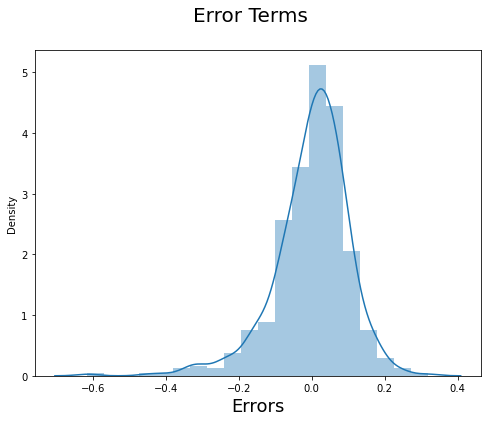

In [79]:
res = y_train-y_train_pred

# Plotting the histogram of the error terms
fig = plt.figure(figsize=[8,6])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Observation: 
We can see that from the above histogram that the Residuals are normally distributed with mean 0. Hence our assumption for Linear Regression is valid.

### Check for Homoscedasticity

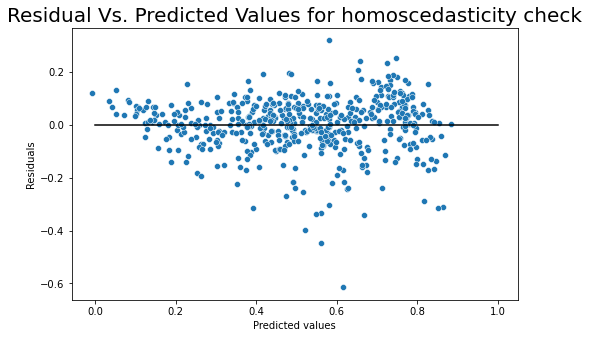

In [80]:
## Checking for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='Black')
p = plt.title('Residual Vs. Predicted Values for homoscedasticity check', fontsize = 20)

Observation:
From the above plot it is clearyly showing that residuals have no auto-correlation variance across the regression line.


# 7. Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 8th model.

#### Applying the scaling on the test sets

In [81]:
## Applying scaler() to all numeric variables in test dataset. 

num_vars = ['temp', 'atemp', 'Humidity', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [82]:
df_test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,Season_spring,Season_summer,...,Month_oct,Month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,Weather_good,Weather_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,1,0


In [83]:
df_test.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,Season_spring,Season_summer,...,Month_oct,Month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,Weather_good,Weather_moderate
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.652968,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.477117,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [84]:
y_test = df_test.pop('cnt')
X_test = df_test

In [85]:
## Selecting the final model variables.
col1_test = X_train_new.columns

X_test = X_test[col1_test]

In [86]:
## Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.head()

,const,Year,holiday,temp,windspeed,Season_summer,Season_winter,Month_sept,Weather_moderate
184,1.0,0,1,0.831783,0.084219,0,0,0,1
535,1.0,1,0,0.901354,0.153728,1,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0


In [87]:
## Making predictions using the final model (lr8)
y_test_pred = lr8.predict(X_test_lm8)

## 8. Model Evaluation

Text(0, 0.5, 'y_test_pred')

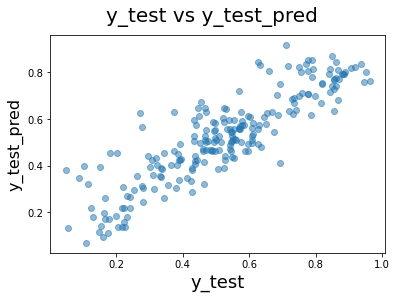

In [88]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

Observation: From the above graph we can clearly see the linear relationship between y_test and y_test_pred.

### R^2 Value for TEST

In [89]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test_data r^2 :',round((r2_test*100),2))
print('Train_data r^2 :',round((r2_train*100),2))

Test_data r^2 : 76.9
Train_data r^2 : 78.73


### Adjusted R^2 Value for TEST

Formula for Adjusted R^2

Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-p-1)]

In [90]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_new.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_new.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test_adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train_adjusted r^2 :',round((adjusted_r2_train*100),2))

Test_adjusted r^2 : 76.02
Train_adjusted r^2 : 78.39


### Comparision between Training and Testing dataset:

- Train data R^2          : 78.73
- Test_data R^2           : 76.9
- Train data Adjusted R^2 : 76.02   
- Test data Adjusted R^2  : 78.39

This seems to be a really good model that can very well 'Generalize' various datasets.

# Conclusion

According to my final model, temp, weather and year variables influencing the bike bookings the most.

To achieve the maximum bookings, it is recommended to give the utmost importance to these variables while planning.

Demand of bikes are depend on other variables also like: 
  If it is holiday and the weather is clear/Good.
  In the month of September and 2019 year.
  In Summer and Winter seasons.